In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Print shape of dataset
print(df.shape)

(7043, 21)


In [5]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [6]:
features_with_na

[]

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop('customerID', inplace=True, axis=1)

In [9]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values if necessary (for example, with 0)
df['TotalCharges'].fillna(0, inplace=True)

# Convert to int
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 4


In [12]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 16


In [13]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 1


In [14]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define feature columns
feature_cols = df.columns[:-1]

# Preprocessing pipelines for numerical and categorical data
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = list(set(feature_cols) - set(numerical_features))

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X = df[feature_cols]
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed features into a DataFrame for easy viewing
feature_names = (numerical_features + 
                 list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)))
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Display the preprocessed DataFrame
print(X_preprocessed_df.head())

     tenure  MonthlyCharges  TotalCharges  OnlineBackup_No  \
0 -1.277445       -1.160323     -0.992611              0.0   
1  0.066327       -0.259629     -0.172165              1.0   
2 -1.236724       -0.362660     -0.958066              0.0   
3  0.514251       -0.746535     -0.193672              1.0   
4 -1.236724        0.197365     -0.938874              1.0   

   OnlineBackup_No internet service  OnlineBackup_Yes  PhoneService_No  \
0                               0.0               1.0              1.0   
1                               0.0               0.0              0.0   
2                               0.0               1.0              0.0   
3                               0.0               0.0              1.0   
4                               0.0               0.0              0.0   

   PhoneService_Yes  MultipleLines_No  MultipleLines_No phone service  ...  \
0               0.0               0.0                             1.0  ...   
1               1.0       

In [16]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [17]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [18]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [19]:
# If the target column has Yes it is encoded as 1 others as 0
y= np.where(y=='Yes', 1,0)

In [20]:
y

array([0, 0, 1, ..., 0, 1, 0])

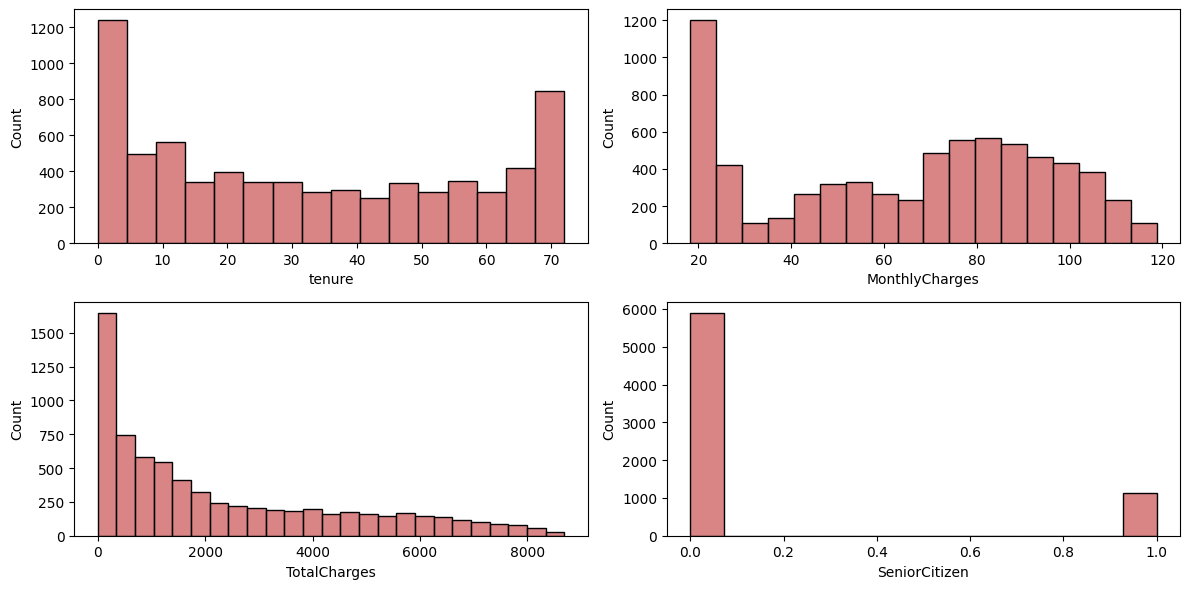

In [21]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['tenure','MonthlyCharges','TotalCharges', 'SeniorCitizen']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [22]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

In [23]:
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PowerTransformer

# Calculate original skewness
original_skewness = df[['tenure', 'MonthlyCharges', 'TotalCharges']].apply(skew)
print("Original Skewness:\n", original_skewness)

# Log Transformation
df['tenure_log'] = np.log1p(df['tenure'])
df['MonthlyCharges_log'] = np.log1p(df['MonthlyCharges'])
df['TotalCharges_log'] = np.log1p(df['TotalCharges'])
log_skewness = df[['tenure_log', 'MonthlyCharges_log', 'TotalCharges_log']].apply(skew)
print("\nLog Transformation Skewness:\n", log_skewness)

# Square Root Transformation
df['tenure_sqrt'] = np.sqrt(df['tenure'])
df['MonthlyCharges_sqrt'] = np.sqrt(df['MonthlyCharges'])
df['TotalCharges_sqrt'] = np.sqrt(df['TotalCharges'])
sqrt_skewness = df[['tenure_sqrt', 'MonthlyCharges_sqrt', 'TotalCharges_sqrt']].apply(skew)
print("\nSquare Root Transformation Skewness:\n", sqrt_skewness)

# Box-Cox Transformation
df['TotalCharges_boxcox'], _ = boxcox(df['TotalCharges'] + 1)
df['tenure_boxcox'], _ = boxcox(df['tenure'] + 1)
df['MonthlyCharges_boxcox'], _ = boxcox(df['MonthlyCharges'] + 1)
boxcox_skewness = df[['tenure_boxcox', 'MonthlyCharges_boxcox', 'TotalCharges_boxcox']].apply(skew)
print("\nBox-Cox Transformation Skewness:\n", boxcox_skewness)

# Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df[['tenure_yeo', 'MonthlyCharges_yeo', 'TotalCharges_yeo']] = pt.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
yeo_skewness = df[['tenure_yeo', 'MonthlyCharges_yeo', 'TotalCharges_yeo']].apply(skew)
print("\nYeo-Johnson Transformation Skewness:\n", yeo_skewness)

# Reciprocal Transformation
df['tenure_reciprocal'] = 1 / (df['tenure'] + 1)
df['MonthlyCharges_reciprocal'] = 1 / (df['MonthlyCharges'] + 1)
df['TotalCharges_reciprocal'] = 1 / (df['TotalCharges'] + 1)
reciprocal_skewness = df[['tenure_reciprocal', 'MonthlyCharges_reciprocal', 'TotalCharges_reciprocal']].apply(skew)
print("\nReciprocal Transformation Skewness:\n", reciprocal_skewness)

Original Skewness:
 tenure            0.239489
MonthlyCharges   -0.220477
TotalCharges      0.963029
dtype: float64

Log Transformation Skewness:
 tenure_log           -0.778204
MonthlyCharges_log   -0.718864
TotalCharges_log     -0.824282
dtype: float64

Square Root Transformation Skewness:
 tenure_sqrt           -0.235949
MonthlyCharges_sqrt   -0.484454
TotalCharges_sqrt      0.307655
dtype: float64

Box-Cox Transformation Skewness:
 tenure_boxcox           -0.243273
MonthlyCharges_boxcox   -0.258980
TotalCharges_boxcox     -0.146089
dtype: float64

Yeo-Johnson Transformation Skewness:
 tenure_yeo           -0.243273
MonthlyCharges_yeo   -0.258980
TotalCharges_yeo     -0.146089
dtype: float64

Reciprocal Transformation Skewness:
 tenure_reciprocal             2.105967
MonthlyCharges_reciprocal     1.092590
TotalCharges_reciprocal      23.550271
dtype: float64


In [24]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

gender : 2
Partner : 2
Dependents : 2
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
Churn : 2


In [25]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [26]:
num_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [27]:
# Define column groups
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

skewed_numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
other_numerical_columns = ['SeniorCitizen']

# Define preprocessors
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

skewed_numerical_transformer = Pipeline(steps=[
    ('yeo-johnson', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

other_numerical_transformer = StandardScaler()

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', categorical_transformer, categorical_columns),
        ('skewed_num', skewed_numerical_transformer, skewed_numerical_columns),
        ('num', other_numerical_transformer, other_numerical_columns)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed features into a DataFrame for easy viewing
# Get feature names for the onehot encoded columns
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_columns)
feature_names = list(onehot_feature_names) + skewed_numerical_columns + other_numerical_columns
X = pd.DataFrame(X_preprocessed, columns=feature_names)
#X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Display the preprocessed DataFrame
print(X.head())

   gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  \
0            1.0          0.0         0.0          1.0            1.0   
1            0.0          1.0         1.0          0.0            1.0   
2            0.0          1.0         1.0          0.0            1.0   
3            0.0          1.0         1.0          0.0            1.0   
4            1.0          0.0         1.0          0.0            1.0   

   Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0             0.0              1.0               0.0               0.0   
1             0.0              0.0               1.0               1.0   
2             0.0              0.0               1.0               1.0   
3             0.0              1.0               0.0               0.0   
4             0.0              0.0               1.0               1.0   

   MultipleLines_No phone service  ...  PaperlessBilling_No  \
0                             1.0  ...               

In [28]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)


In [29]:
X_res

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.297205,-0.239492,0.254809,-0.439916
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.000000,0.000000,0.000000,0.646327,-0.731079,0.233807,-0.439916
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.000000,0.000000,1.000000,-0.788711,-1.162020,-0.923101,-0.439916
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.000000,0.000000,0.000000,1.104454,-0.266077,0.790141,-0.439916
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.000000,0.000000,1.000000,-0.606223,-0.473076,-0.558403,-0.439916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.000000,1.000000,0.000000,-1.195878,0.489996,-0.826723,-0.439916
6494,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.000000,0.767279,0.232721,-1.290051,-1.081411,-1.330556,-0.439916
6495,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.000000,1.000000,0.000000,-1.586501,-0.634598,-1.606813,-0.439916
6496,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.000000,1.000000,0.000000,-1.141980,-1.516562,-1.391884,0.960869


In [30]:
y_res

array([0, 0, 0, ..., 1, 1, 1])

# Test Train Split

In [37]:
! pip install xgboost
! pip install catboost

   ---------------------------------------- 0.0/101.8 MB ? eta -:--:--
   ---- ----------------------------------- 12.1/101.8 MB 58.1 MB/s eta 0:00:02
   ----------- ---------------------------- 29.4/101.8 MB 71.7 MB/s eta 0:00:02
   ------------------ --------------------- 45.9/101.8 MB 73.0 MB/s eta 0:00:01
   ---------------------- ----------------- 57.7/101.8 MB 68.0 MB/s eta 0:00:01
   ---------------------------- ----------- 73.1/101.8 MB 68.6 MB/s eta 0:00:01
   --------------------------------- ------ 86.0/101.8 MB 66.9 MB/s eta 0:00:01
   --------------------------------------  101.2/101.8 MB 67.3 MB/s eta 0:00:01
   --------------------------------------- 101.8/101.8 MB 60.7 MB/s eta 0:00:00


In [38]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5198, 45), (1300, 45))

In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [40]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [41]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [42]:
# Function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [43]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9723
- F1 score: 0.9754
- Precision: 0.9675
- Recall: 0.9835
- Roc Auc Score: 0.9708


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9408
- F1 score: 0.9477
- Precision: 0.9357
- Recall: 0.9601
- Roc Auc Score: 0.9382


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9567
- F1 score: 0.9620
- Precision: 0.9557
- Recall: 0.9684
- Roc Auc Score: 0.9550
----------------------------------
Model performance for Test set
- Accuracy: 0.9500
- F1 score: 0.9558
- Precision: 0.9461
- Recall: 0.9656
- Roc Auc Score: 0.9479


Logistic Regression
Model performance for Training 

In [44]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.972308
5,XGBClassifier,0.964615
6,CatBoosting Classifier,0.964615
2,Gradient Boosting,0.950000
4,K-Neighbors Classifier,0.950000
1,Decision Tree,0.940769
8,AdaBoost Classifier,0.940000
7,Support Vector Classifier,0.930769
3,Logistic Regression,0.921538


In [45]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

catboost_params = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8]
}

In [46]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("CatBoost",CatBoostClassifier(verbose=False), catboost_params )
]

In [47]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 9}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': None}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}
---------------- Best Params for CatBoost -------------------
{'learning_rate': 0.1, 'iterations': 200, 'depth': 8}


In [48]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 100, 'max_features': 'log2', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'},
 'CatBoost': {'learning_rate': 0.1, 'iterations': 200, 'depth': 8}}

In [49]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    "CatBoostClassifier": CatBoostClassifier(**model_param['CatBoost'])
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9715
- F1 score: 0.9748
- Precision: 0.9662
- Recall: 0.9835
- Roc Auc Score: 0.9699


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9723
- F1 score: 0.9758
- Precision: 0.9540
- Recall: 0.9986
- Roc Auc Score: 0.9688


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9638
- F1 score: 0.9679
- Precision: 0.9620
- Recall: 0.9739
- Roc Auc Score: 0.9625


0:	learn: 0.5569115	total: 10.2ms	rem

In [50]:
tuned_report

,Model Name,Accuracy
3,CatBoostClassifier,0.976154
1,KNeighborsClassifier,0.972308
0,Random Forest Classifier,0.971538
2,XGBClassifier,0.963846


In [51]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9723
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       573
           1       0.95      1.00      0.98       727

    accuracy                           0.97      1300
   macro avg       0.98      0.97      0.97      1300
weighted avg       0.97      0.97      0.97      1300



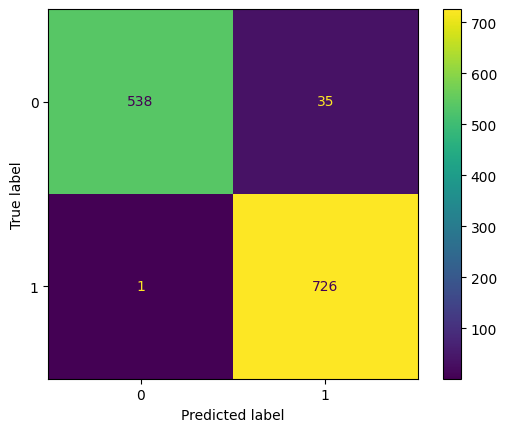

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)